In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.pandas.set_option('display.max_columns', None)

In [44]:
dataset = pd.read_csv('House_Price.csv', header=0)

In [45]:
dataset.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


# Feature Engineering
1. Missing Values
2. Temporal Variables
3. Numerical Features - skewed or not
3. Categorical variables: remove rare labels
4. Outlier Removal
5. encoding categorical variables
6. train test split
5. Standardise numerical variables

## 1. Missing Values
We know that missing values exist in n_hos_beds, which is a numerical variable, so we'll handle it using fillna method

In [46]:
median_value = dataset['n_hos_beds'].median()
dataset['n_hos_beds'].fillna(median_value, inplace= True)
dataset.isnull().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     0
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

## 3. Numerical Variables
We know that the numerical variables are skewed. All the numerical variables can be converted into log normal form. because none of the variables contain zero variable.

In [47]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
len(numerical_features)

16

In [48]:
for feature in numerical_features:
    dataset[feature] = np.log(dataset[feature])

In [49]:
dataset[numerical_features].head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
0,3.178054,-5.064036,3.475377,-0.619897,1.883275,4.177459,1.470176,1.337629,1.430311,1.388791,3.206803,1.605430,1.701105,2.415199,3.135494,-3.008872
1,3.072693,-3.600502,3.612808,-0.757153,1.859574,4.368181,1.607436,1.547563,1.633154,1.621366,3.100092,2.212660,1.992248,2.499204,3.737670,-3.075953
2,3.546740,-3.601235,3.612808,-0.757153,1.971996,4.112512,1.615420,1.581038,1.611436,1.603420,3.100092,1.393766,2.000669,4.616308,3.637586,-3.084258
3,3.508556,-3.430523,3.471345,-0.780886,1.945624,3.824284,1.826161,1.780024,1.818077,1.785070,3.058707,1.078410,2.226568,2.421896,3.806662,-3.054409
4,3.589059,-2.672924,3.471345,-0.780886,1.966693,3.992681,1.818077,1.768150,1.851599,1.768150,3.058707,1.673351,2.177475,2.423882,4.007333,-3.232113


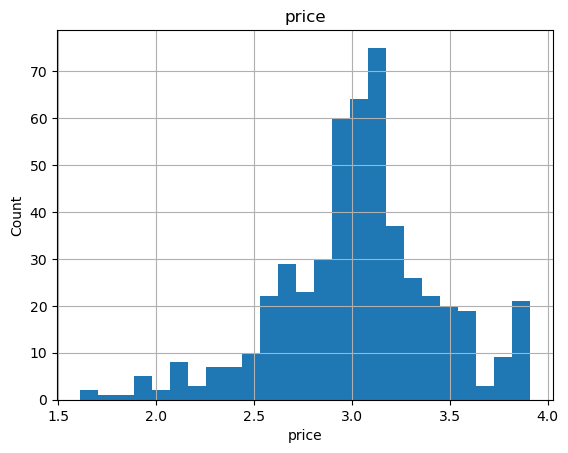

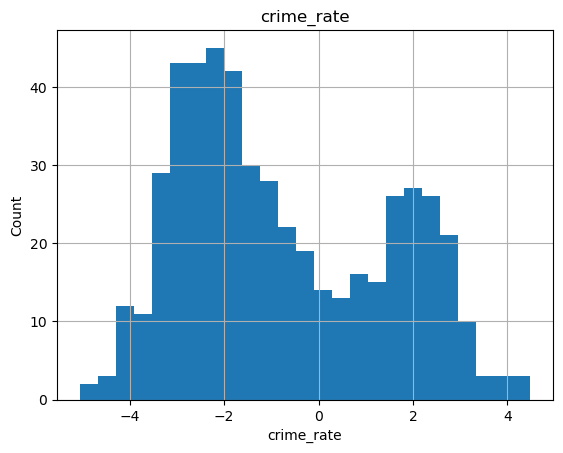

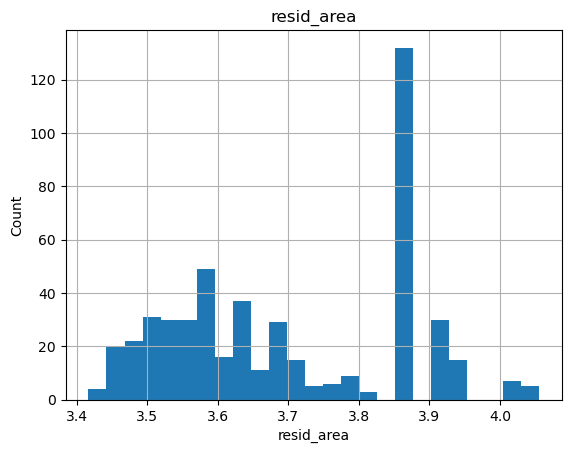

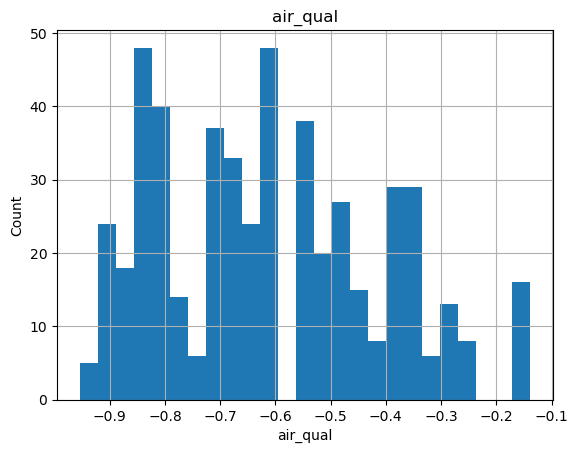

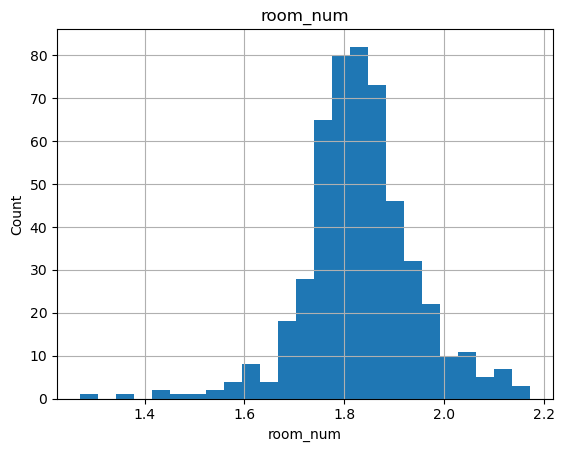

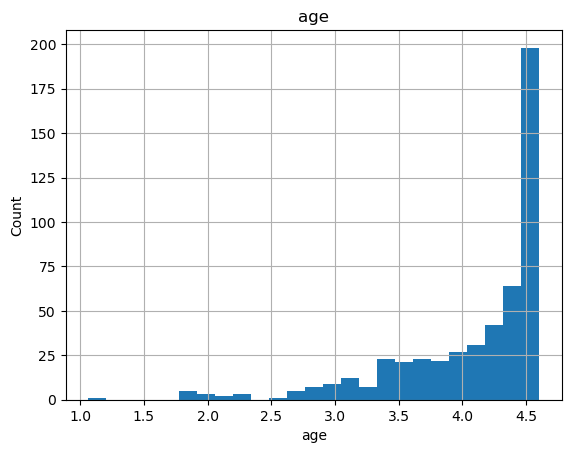

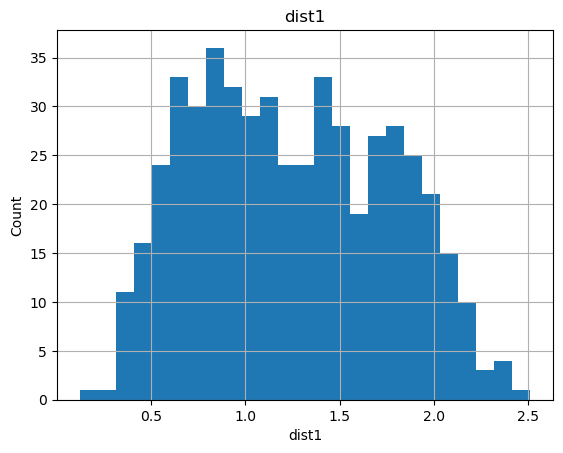

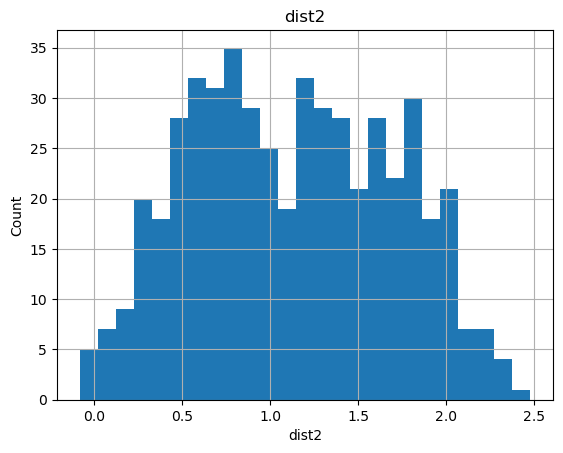

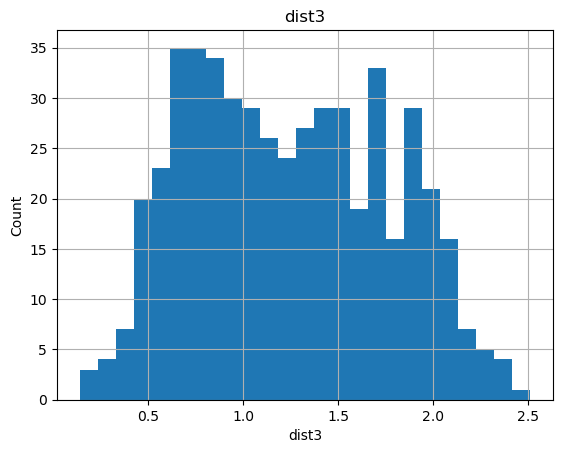

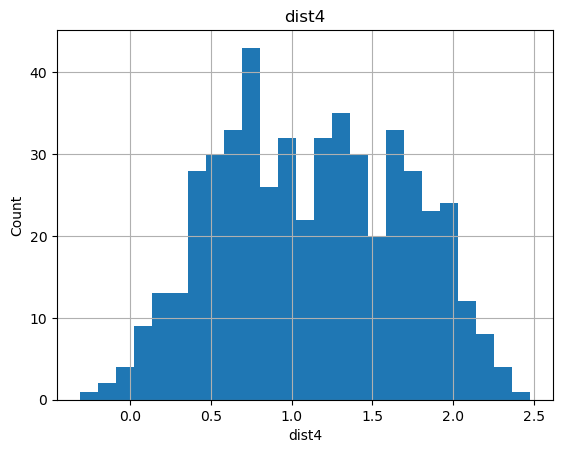

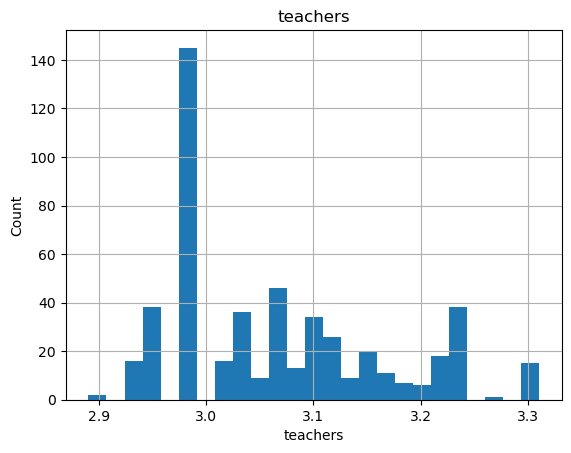

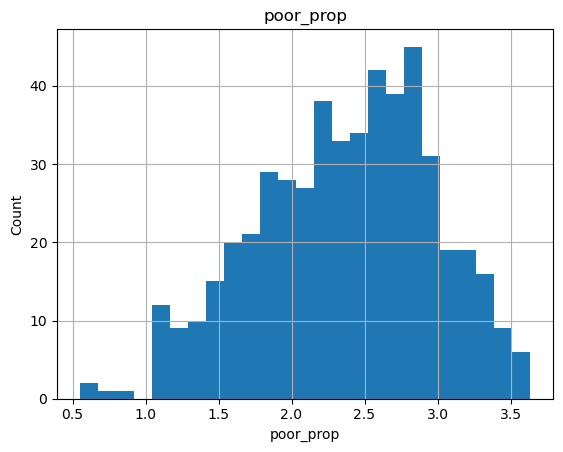

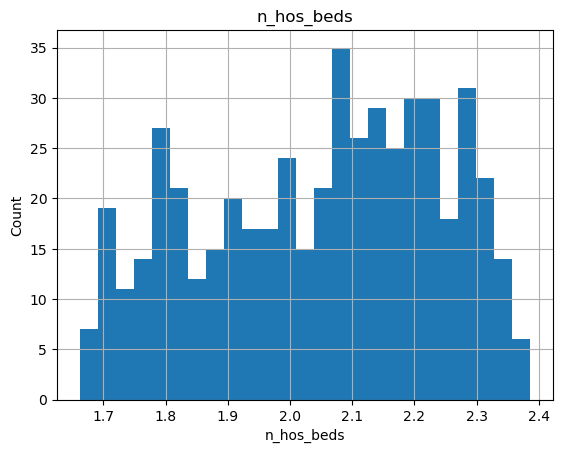

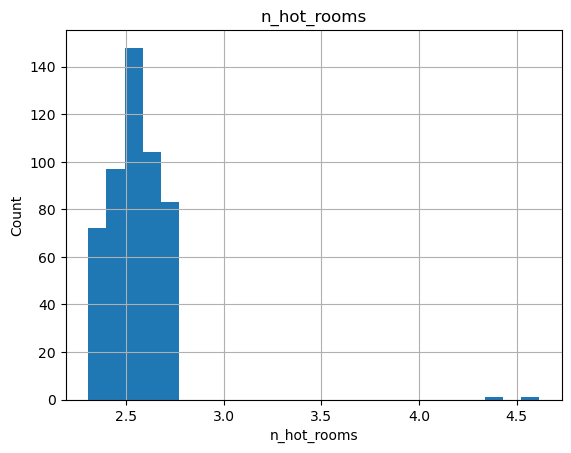

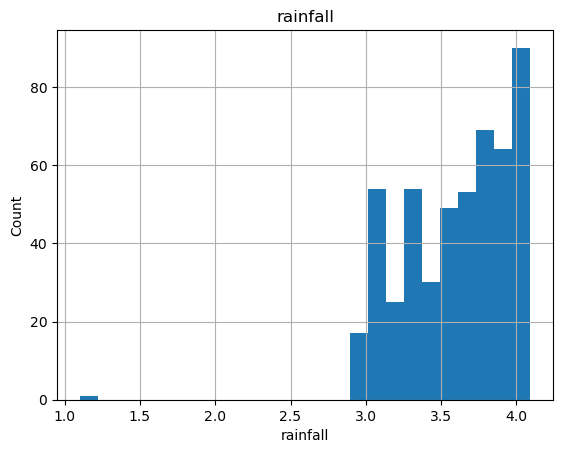

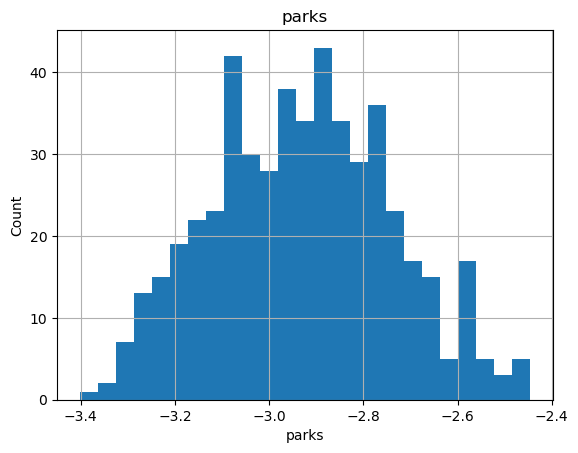

In [50]:
for feature in numerical_features:
    data = dataset.copy()
    data[feature].hist(bins=25)
    
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Our data now looks better and not skewed.

## 4. Categorical Features

In [51]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']
categorical_features

['airport', 'waterbody', 'bus_ter']

In [52]:
for feature in categorical_features:
    temp = dataset.groupby(feature)['price'].count()/len(dataset)
    temp_df = temp[temp>0.01].index
    dataset[feature] = np.where(dataset[feature].isin(temp_df), dataset[feature], 'Rare_var')

In [53]:
dataset[categorical_features].head(100)

,airport,waterbody,bus_ter
0,YES,River,YES
1,NO,Lake,YES
2,NO,None,YES
3,YES,Lake,YES
4,NO,Lake,YES
...,...,...,...
95,NO,River,YES
96,NO,River,YES
97,YES,River,YES
98,YES,Lake and River,YES


#### Observation - 
No rare categories exists

## 5. Outliers Removal
### Using IQR

In [54]:
def remove_outliers_iqr(df, numerical_features):
    df_filtered = df.copy()
    
    for feature in numerical_features:
        q1 = df_filtered[feature].quantile(0.25)
        q3 = df_filtered[feature].quantile(0.75)
        iqr = q3 - q1
        
        lower_fence = q1 - 1.5 * iqr
        upper_fence = q3 + 1.5 * iqr
        
        df_filtered = df_filtered[(df_filtered[feature] >= lower_fence) & (df_filtered[feature] <= upper_fence)]
    
    return df_filtered

In [55]:
dataset = remove_outliers_iqr(dataset,numerical_features)

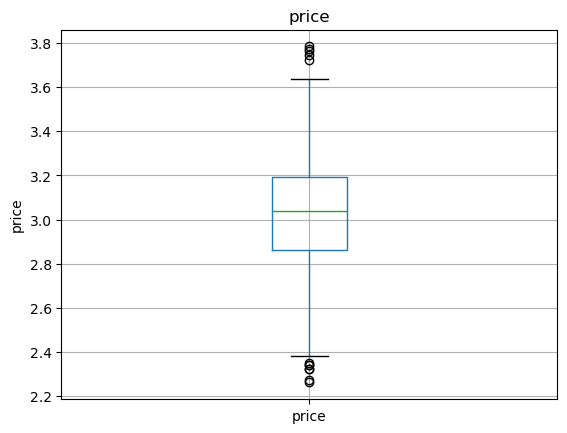

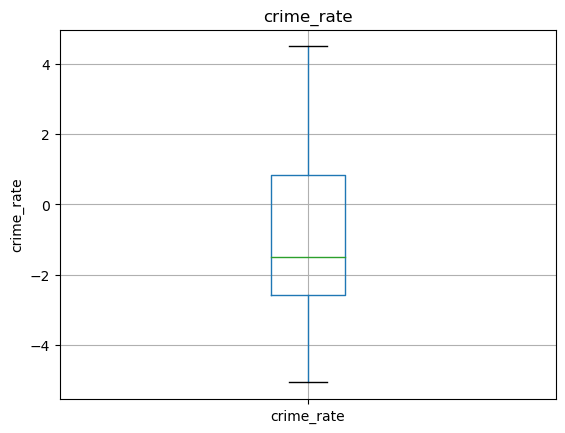

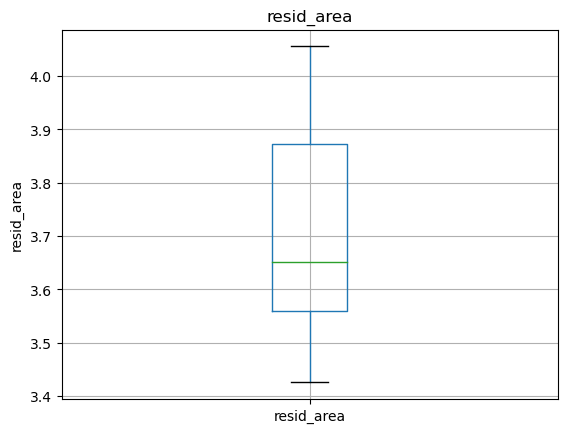

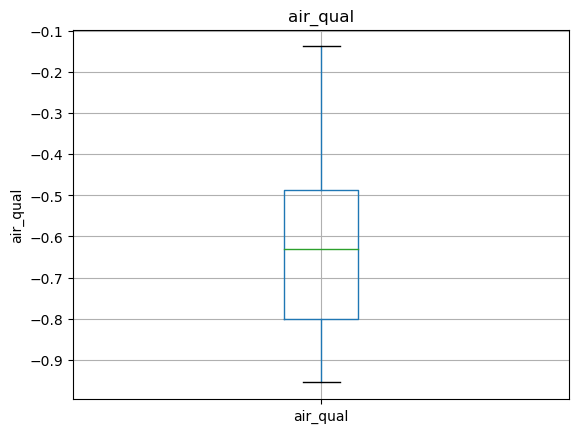

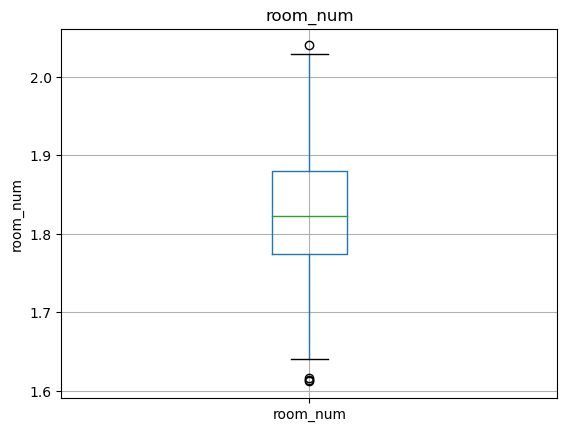

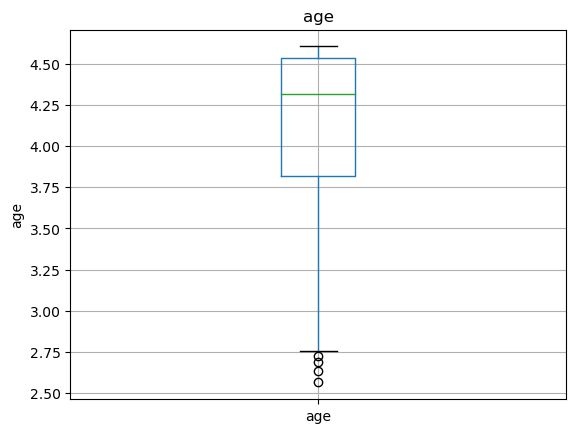

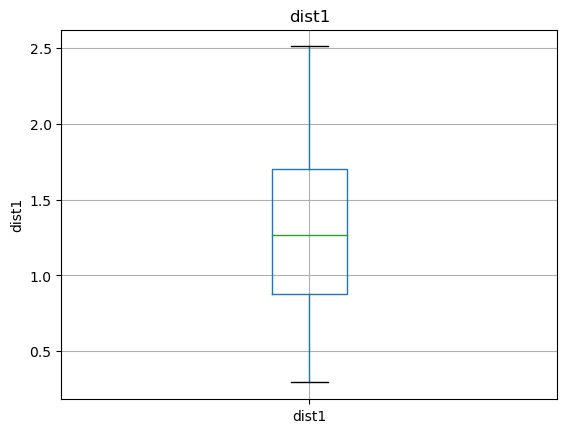

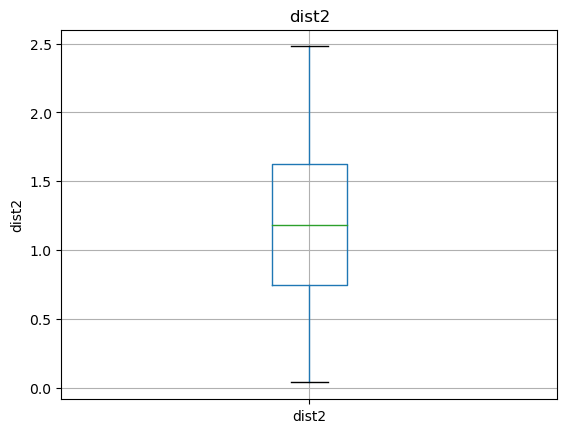

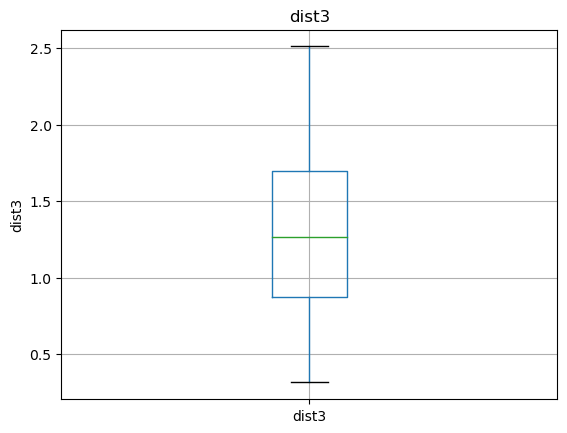

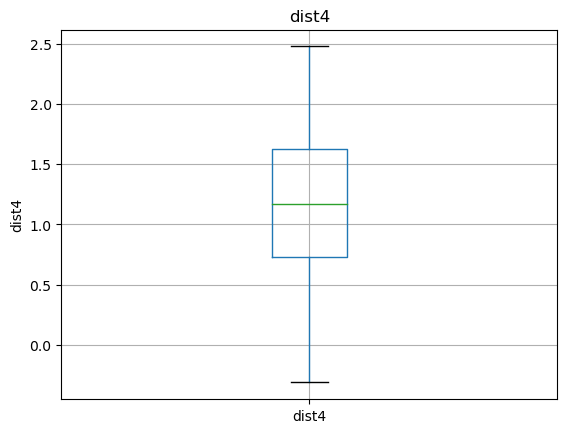

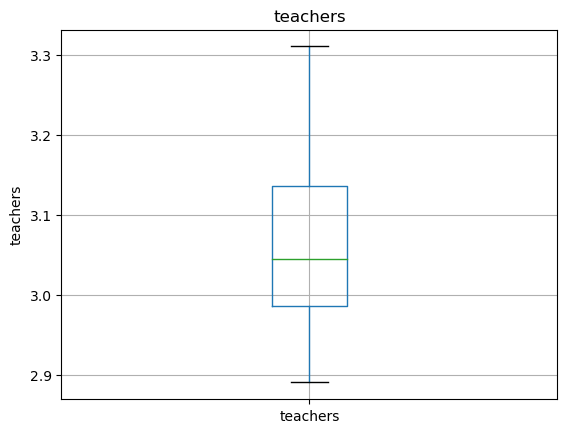

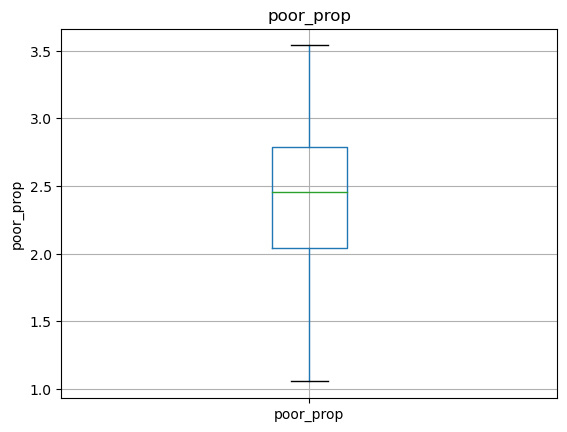

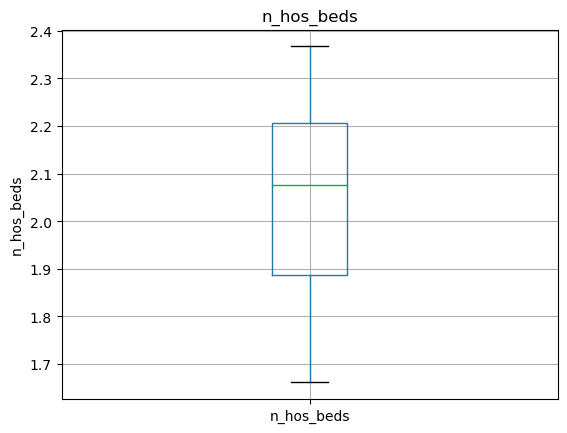

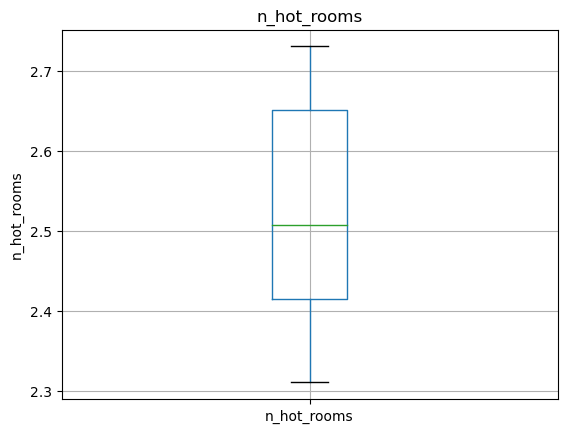

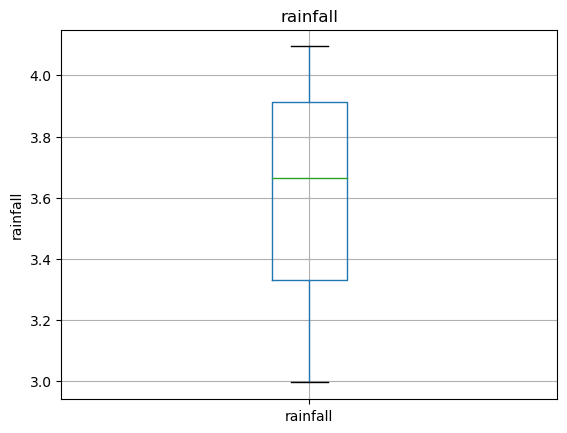

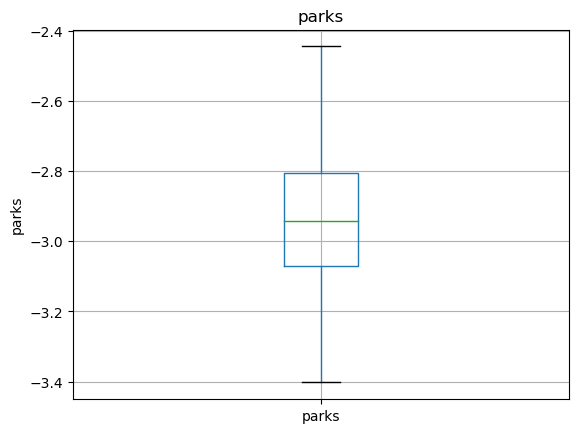

In [56]:
for feature in numerical_features:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

#### Observation-

Outliers have been reduced and removed.

In [57]:
dataset.isnull().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     0
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

## 6. Encoding Categorical Variables

In [58]:
dataset[categorical_features].head()

,airport,waterbody,bus_ter
0,YES,River,YES
1,NO,Lake,YES
3,YES,Lake,YES
4,NO,Lake,YES
5,YES,None,YES


In [59]:
# encoding categorical data

#encoding independent variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [0,1,2])], remainder= 'passthrough')
x = ct.fit_transform(dataset[categorical_features])
x

array([[0., 1., 0., ..., 0., 1., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.]])

In [60]:
feature_names = ct.named_transformers_['encoder'].get_feature_names_out(input_features=categorical_features)
print(feature_names)

# Create a DataFrame with the encoded data and appropriate column names
encoded_data = pd.DataFrame(x, columns=feature_names)

# Merge the encoded output with the original dataset
merged = pd.concat([dataset.reset_index(drop=True), encoded_data], axis=1)

['airport_NO' 'airport_YES' 'waterbody_Lake' 'waterbody_Lake and River'
 'waterbody_None' 'waterbody_River' 'bus_ter_YES']


In [61]:
dataset = dataset.drop(columns=categorical_features)

In [62]:
dataset.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
0,3.178054,-5.064036,3.475377,-0.619897,1.883275,4.177459,1.470176,1.337629,1.430311,1.388791,3.206803,1.605430,1.701105,2.415199,3.135494,-3.008872
1,3.072693,-3.600502,3.612808,-0.757153,1.859574,4.368181,1.607436,1.547563,1.633154,1.621366,3.100092,2.212660,1.992248,2.499204,3.737670,-3.075953
3,3.508556,-3.430523,3.471345,-0.780886,1.945624,3.824284,1.826161,1.780024,1.818077,1.785070,3.058707,1.078410,2.226568,2.421896,3.806662,-3.054409
4,3.589059,-2.672924,3.471345,-0.780886,1.966693,3.992681,1.818077,1.768150,1.851599,1.768150,3.058707,1.673351,2.177475,2.423882,4.007333,-3.232113
5,3.356897,-3.511570,3.471345,-0.780886,1.860975,4.072440,1.827770,1.757858,1.829376,1.790091,3.058707,1.650580,1.970463,2.655324,3.970292,-3.081080


## 7. Train Test Split

In [63]:
x = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 42)

## 8. Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [66]:
# Fit and transform the training data
x_train = pd.DataFrame(sc.fit_transform(x_train), columns=numerical_features[1:])

# Transform the testing data using the fitted scaler
x_test = pd.DataFrame(sc.fit_transform(x_test), columns=numerical_features[1:])

# Feature Selection

In [67]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [68]:
lasso = Lasso(alpha = 0.005, random_state=0)

In [69]:
feature_sel_model = SelectFromModel(estimator= lasso)

In [70]:
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [71]:
feature_sel_model.get_support()

array([ True, False,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False,  True, False])

In [72]:
selected_features = x_train.columns[(feature_sel_model.get_support())]

In [73]:
print('Total features: {}'.format((x_train.shape[1])))
print('No. of selected features: {}'.format(len(selected_features)))
print('Features with coefficient shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

Total features: 15
No. of selected features: 9
Features with coefficient shrank to zero: 6


In [74]:
selected_features

Index(['crime_rate', 'air_qual', 'room_num', 'age', 'dist1', 'teachers',
       'poor_prop', 'n_hos_beds', 'rainfall'],
      dtype='object')

In [76]:
x_train = x_train[selected_features]
x_test = x_test[selected_features]

In [80]:
x_train.to_csv('x_train.csv',index=False)
x_test.to_csv('x_test.csv',index=False)
pd.DataFrame(y_train).to_csv('y_train.csv',index=False)
pd.DataFrame(y_test).to_csv('y_test.csv',index=False)